In [1]:
import seaborn
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
import seaborn
import cmocean
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns


# directory to save figures
figdir = "/home/rfrost/vorticity_figures/"
# absolute path to directory with probability density function data
pdf_dir = "/home/rfrost/simulations/nc/"
# simulation to analyze
sims = ["full_step_6", "full_step_9", "full_step_12", "full_step_15"]
# height in meters to be plot
height = 6
# start and end timesteps
t0 = 576000
t1 = 1152000
# start and end in hours
t0hr = t0 * 0.05 / 3600
t1hr = t1 * 0.05 / 3600
# spacing of output
dt = 1000

# full path to pdf file
pdf_dir = f"{pdf_dir}{t0}_{t1}_vort_pdf_plot_params_{height}m.nc"
# lists to store stats, roll factor, and length scales
s_all, vort_all, vort_ac_all, vort_ls_all, roll_all = [], [], [], [], []
# loop over sims
for sim in sims:
    dnc = f"/home/rfrost/simulations/nc/{sim}/"
    # volumetric stats
    s = xr.open_dataset(f"{dnc}{t0}_{t1}_stats.nc")
    s["time"] = s.time / 3600 + t0hr
    s_all.append(s)
    # vorticity stats
    vort = xr.open_dataset(f"{dnc}{t0}_{t1}_vort.nc")
    vort["time"] = vort.time / 3600 + t0hr
    vort_all.append(vort)
    # vorticity autocorrelation
    vort_ac = xr.open_dataset(f"{dnc}{t0}_{t1}_vort_autocorr.nc")
    vort_ac["time"] = vort_ac.time / 3600 + t0hr
    vort_ac_all.append(vort_ac)
    # vorticity length scales
    vort_ls = xr.open_dataset(f"{dnc}{t0}_{t1}_vort_ls.nc")
    vort_ls["time"] = vort_ls.time / 3600 + t0hr
    vort_ls_all.append(vort_ls)
    # vorticity roll factor
    roll = xr.open_dataarray(f"{dnc}{t0}_{t1}_roll_factor_omega_z_filtered.nc")
    roll["time"] = roll.time / 3600 + t0hr
    roll_all.append(roll)


# Plotting set up
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
rc('font', family='sans-serif')
rc('font', weight='normal', size=20)
rc('figure', facecolor='white')
ug_list = ["6", "9", "12", "15"]
time_colors = ["black", "red", "red", "blue", "blue"]
ug_colors = seaborn.color_palette("flare", 4)
linestyle = ["solid","solid","--","solid","--"]

In [2]:
for i, s in enumerate(s_all):
    s["zi_L_rolling"] = s.zi_L.rolling(time=24).mean(0)
for i, v in enumerate(vort_all):
    v["omega_z_abs_mean_rolling"] = v.omega_z_abs_mean.rolling(time=24).mean()
roll_rolling = []
for i, r in enumerate(roll_all):
    roll = r.rolling(time=24).mean()
    roll_rolling.append(roll)

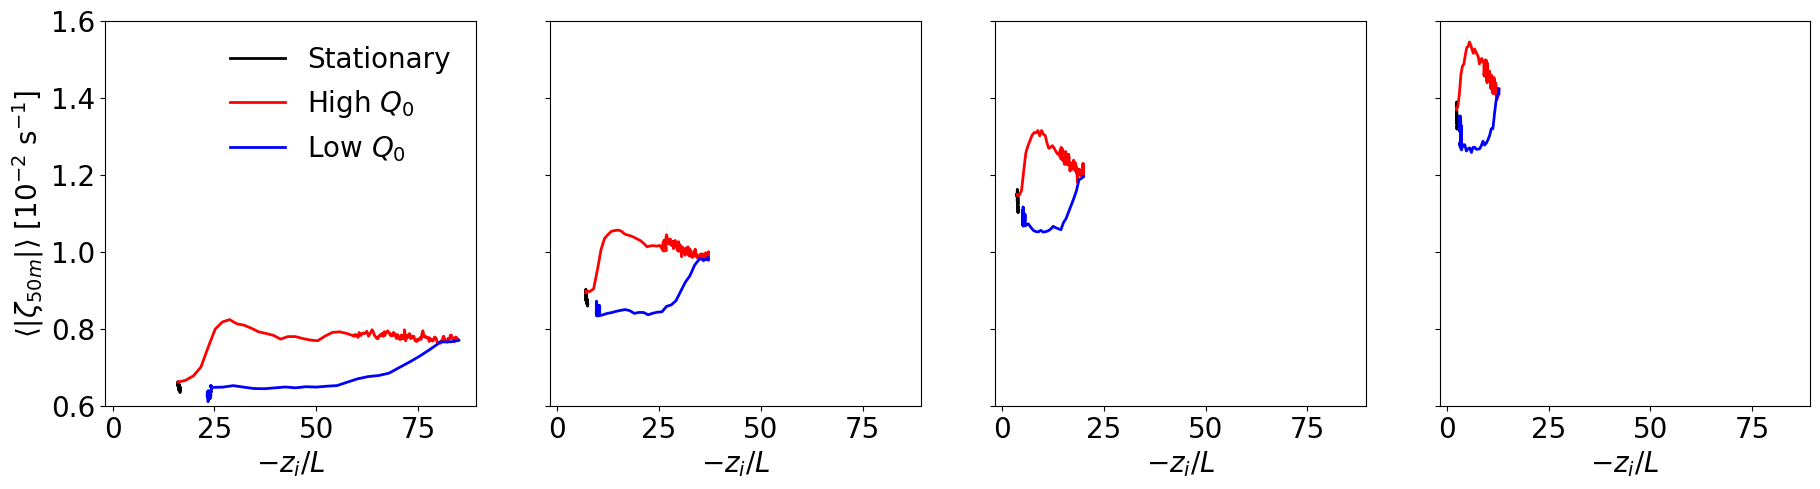

In [3]:
colors2 = ["black", "red", "blue"]

fig, ax = plt.subplots(figsize=(22,5), ncols=4, sharex=True, sharey=True)

sim = 0
ax[sim].plot(s_all[sim].zi_L_rolling[:144], 
             vort_all[sim].omega_z_abs_mean[:144,4] * 10 ** 2, 
             label="Stationary", c=colors2[0], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[143:360], 
             vort_all[sim].omega_z_abs_mean[143:360,4] * 10 ** 2, 
             label="High $Q_0$", c=colors2[1], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[359:], 
             vort_all[sim].omega_z_abs_mean[359:,4] * 10 ** 2, 
             label="Low $Q_0$", c=colors2[2], lw=2)

sim = 1
ax[sim].plot(s_all[sim].zi_L_rolling[:144], 
             vort_all[sim].omega_z_abs_mean[:144,4] * 10 ** 2, 
             label="Stationary", c=colors2[0], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[143:360], 
             vort_all[sim].omega_z_abs_mean[143:360,4] * 10 ** 2, 
             label="High $Q_0$", c=colors2[1], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[359:], 
             vort_all[sim].omega_z_abs_mean[359:,4] * 10 ** 2, 
             label="Low $Q_0$", c=colors2[2], lw=2)

sim = 2
ax[sim].plot(s_all[sim].zi_L_rolling[:144], 
             vort_all[sim].omega_z_abs_mean[:144,4] * 10 ** 2, 
             label="Stationary", c=colors2[0], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[143:360], 
             vort_all[sim].omega_z_abs_mean[143:360,4] * 10 ** 2, 
             label="High $Q_0$", c=colors2[1], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[359:], 
             vort_all[sim].omega_z_abs_mean[359:,4] * 10 ** 2, 
             label="Low $Q_0$", c=colors2[2], lw=2)

sim = 3
ax[sim].plot(s_all[sim].zi_L_rolling[:144], 
             vort_all[sim].omega_z_abs_mean[:144,4] * 10 ** 2, 
             label="Stationary", c=colors2[0], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[143:360], 
             vort_all[sim].omega_z_abs_mean[143:360,4] * 10 ** 2, 
             label="High $Q_0$", c=colors2[1], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[359:], 
             vort_all[sim].omega_z_abs_mean[359:,4] * 10 ** 2, 
             label="Low $Q_0$", c=colors2[2], lw=2)

ax[0].legend(frameon=False)

ax[0].set_ylabel("$\\langle | \zeta_{50 m} | \\rangle$ [10$^{-2}$ s$^{-1}$]")
ax[0].set_ylim(0.6,1.6)
for iax in ax:
    iax.set_xlabel("$-z_i / L$")

In [4]:
# create vorticity arrays of all simulations
full_vort_array_stationary = np.concatenate((
    vort_all[0].omega_z_abs_mean[:144,4].values,
    vort_all[1].omega_z_abs_mean[:144,4].values,
    vort_all[2].omega_z_abs_mean[:144,4].values,
    vort_all[3].omega_z_abs_mean[:144,4].values
    ))
full_vort_array_high_Q0 = np.concatenate((
    vort_all[0].omega_z_abs_mean[145:360,4].values,
    vort_all[1].omega_z_abs_mean[145:360,4].values,
    vort_all[2].omega_z_abs_mean[145:360,4].values,
    vort_all[3].omega_z_abs_mean[145:360,4].values
    ))
full_vort_array_low_Q0 = np.concatenate((
    vort_all[0].omega_z_abs_mean[361:,4].values,
    vort_all[1].omega_z_abs_mean[361:,4].values,
    vort_all[2].omega_z_abs_mean[361:,4].values,
    vort_all[3].omega_z_abs_mean[361:,4].values
    ))
# create full -zi / L array of all simulations
full_ziL_array_stationary = np.concatenate((
    s_all[0].zi_L[:144].values,
    s_all[1].zi_L[:144].values,
    s_all[2].zi_L[:144].values,
    s_all[3].zi_L[:144].values))
full_ziL_array_high_Q0 = np.concatenate((
    s_all[0].zi_L[145:360].values,
    s_all[1].zi_L[145:360].values,
    s_all[2].zi_L[145:360].values,
    s_all[3].zi_L[145:360].values))
full_ziL_array_low_Q0 = np.concatenate((
    s_all[0].zi_L[361:].values,
    s_all[1].zi_L[361:].values,
    s_all[2].zi_L[361:].values,
    s_all[3].zi_L[361:].values))

Text(0.5, 1.0, 'Integral Length Scale of Surface $\\bf{\\zeta}$')

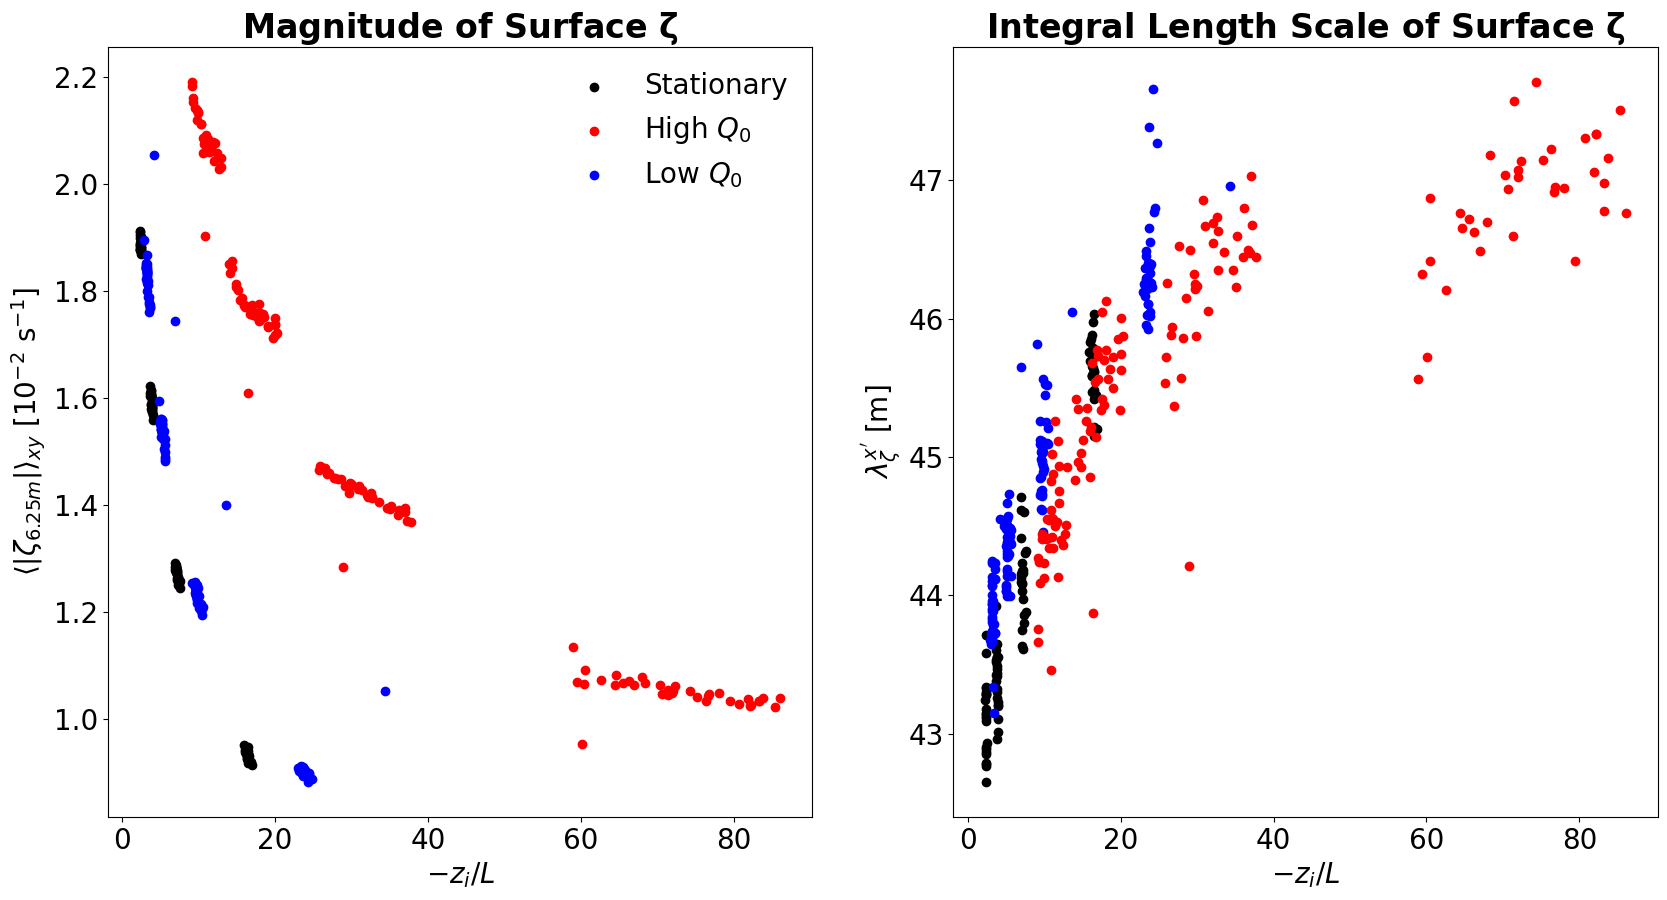

In [5]:
fig, ax = plt.subplots(figsize=(20,10), ncols=2)

spacing = 6
h_idx = 0

# scatter plots
for i in range(4):
    # vorticity magnitude
    ax[0].scatter(s_all[i].zi_L[:144:spacing], 
               vort_all[i].omega_z_abs_mean[:144:spacing,h_idx] * 10 ** 2,
               c=colors2[0])
    ax[0].scatter(s_all[i].zi_L[145:360:spacing],
               vort_all[i].omega_z_abs_mean[145:360:spacing,h_idx] * 10 ** 2,
               c=colors2[1])
    ax[0].scatter(s_all[i].zi_L[361:577:spacing],
               vort_all[i].omega_z_abs_mean[361:577:spacing,h_idx] * 10 ** 2,
               c=colors2[2])
    # vorticity integral length scale
    ax[1].scatter(s_all[i].zi_L[:144:spacing], 
               vort_ls_all[i].ls_zeta3_rolls[:144:spacing,h_idx],
               c=colors2[0])
    ax[1].scatter(s_all[i].zi_L[145:360:spacing],
               vort_ls_all[i].ls_zeta3_rolls[145:360:spacing,h_idx],
               c=colors2[1])
    ax[1].scatter(s_all[i].zi_L[361:577:spacing],
               vort_ls_all[i].ls_zeta3_rolls[361:577:spacing,h_idx],
               c=colors2[2])
    
ax[0].legend(["Stationary", "High $Q_0$", "Low $Q_0$"], frameon=False)

ax[0].set_xlabel("$-z_i / L$")
ax[0].set_ylabel(f"$\\langle | \zeta_{{{s_all[0].z[h_idx].values} m}} | \\rangle_{{xy}}$ [10$^{{-2}}$ s$^{{-1}}$]")
ax[0].set_title("Magnitude of Surface $\\bf{\zeta}$")
ax[1].set_xlabel("$-z_i / L$")
ax[1].set_ylabel("$\lambda_{\zeta}^{x'}$ [m]")
ax[1].set_title("Integral Length Scale of Surface $\\bf{\zeta}$")

Text(0.5, 1.0, 'Roll Factor of Surface $\\bf{\\widetilde{\\zeta}}$')

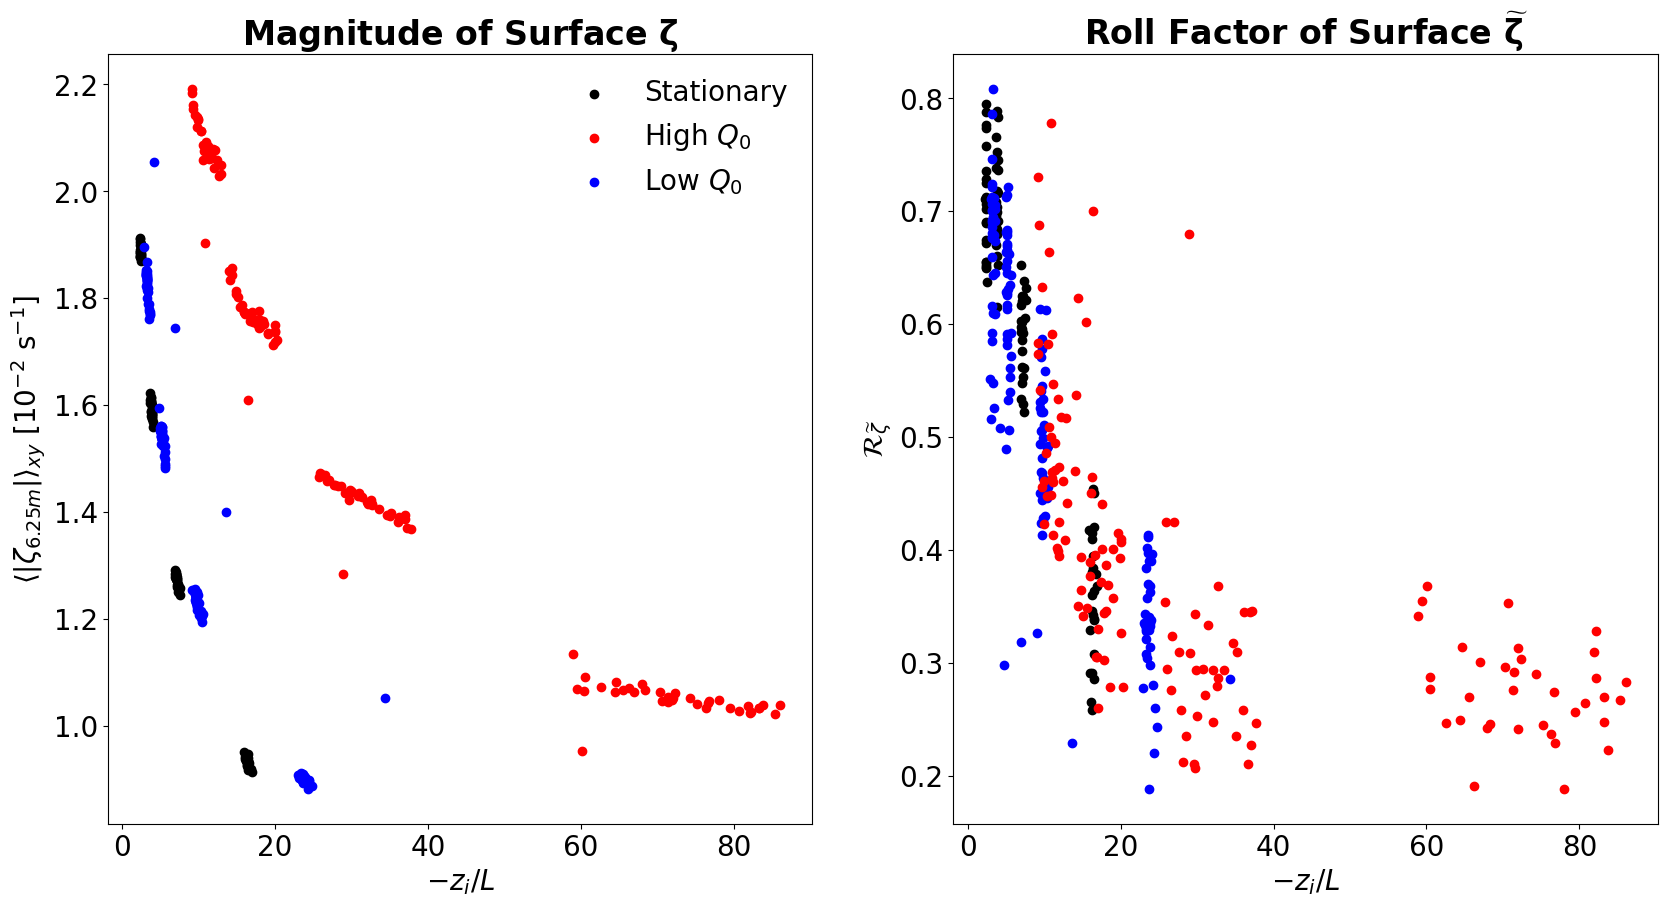

In [6]:
fig, ax = plt.subplots(figsize=(20,10), ncols=2)

spacing = 6
h_idx = 0

# scatter plots
for i in range(4):
    # vorticity magnitude
    ax[0].scatter(s_all[i].zi_L[:144:spacing], 
               vort_all[i].omega_z_abs_mean[:144:spacing,h_idx] * 10 ** 2,
               c=colors2[0])
    ax[0].scatter(s_all[i].zi_L[145:360:spacing],
               vort_all[i].omega_z_abs_mean[145:360:spacing,h_idx] * 10 ** 2,
               c=colors2[1])
    ax[0].scatter(s_all[i].zi_L[361:577:spacing],
               vort_all[i].omega_z_abs_mean[361:577:spacing,h_idx] * 10 ** 2,
               c=colors2[2])
    # vorticity integral length scale
    ax[1].scatter(s_all[i].zi_L[:144:spacing], 
               roll_all[i][:144:spacing],
               c=colors2[0])
    ax[1].scatter(s_all[i].zi_L[145:360:spacing],
               roll_all[i][145:360:spacing],
               c=colors2[1])
    ax[1].scatter(s_all[i].zi_L[361:577:spacing],
               roll_all[i][361:577:spacing],
               c=colors2[2])
    
ax[0].legend(["Stationary", "High $Q_0$", "Low $Q_0$"], frameon=False)

ax[0].set_xlabel("$-z_i / L$")
ax[0].set_ylabel(f"$\\langle | \zeta_{{{s_all[0].z[h_idx].values} m}} | \\rangle_{{xy}}$ [10$^{{-2}}$ s$^{{-1}}$]")
ax[0].set_title("Magnitude of Surface $\\bf{\zeta}$")
ax[1].set_xlabel("$-z_i / L$")
ax[1].set_ylabel("$\mathcal{R}_{\widetilde{\zeta}}$")
ax[1].set_title("Roll Factor of Surface $\\bf{\widetilde{\zeta}}$")

In [7]:
pdf_plot_params = xr.open_dataset(pdf_dir)

bin_edges_stat = pdf_plot_params.bin_edges_stationary
bin_edges_highq0 = pdf_plot_params.bin_edges_high_q0
bin_edges_lowq0 = pdf_plot_params.bin_edges_low_q0

prob_stat = pdf_plot_params.prob_stationary
prob_highq0 = pdf_plot_params.prob_high_q0
prob_lowq0 = pdf_plot_params.prob_low_q0

bin_width_stat = pdf_plot_params.bin_width_stationary
bin_width_highq0 = pdf_plot_params.bin_width_high_q0
bin_width_lowq0 = pdf_plot_params.bin_width_low_q0

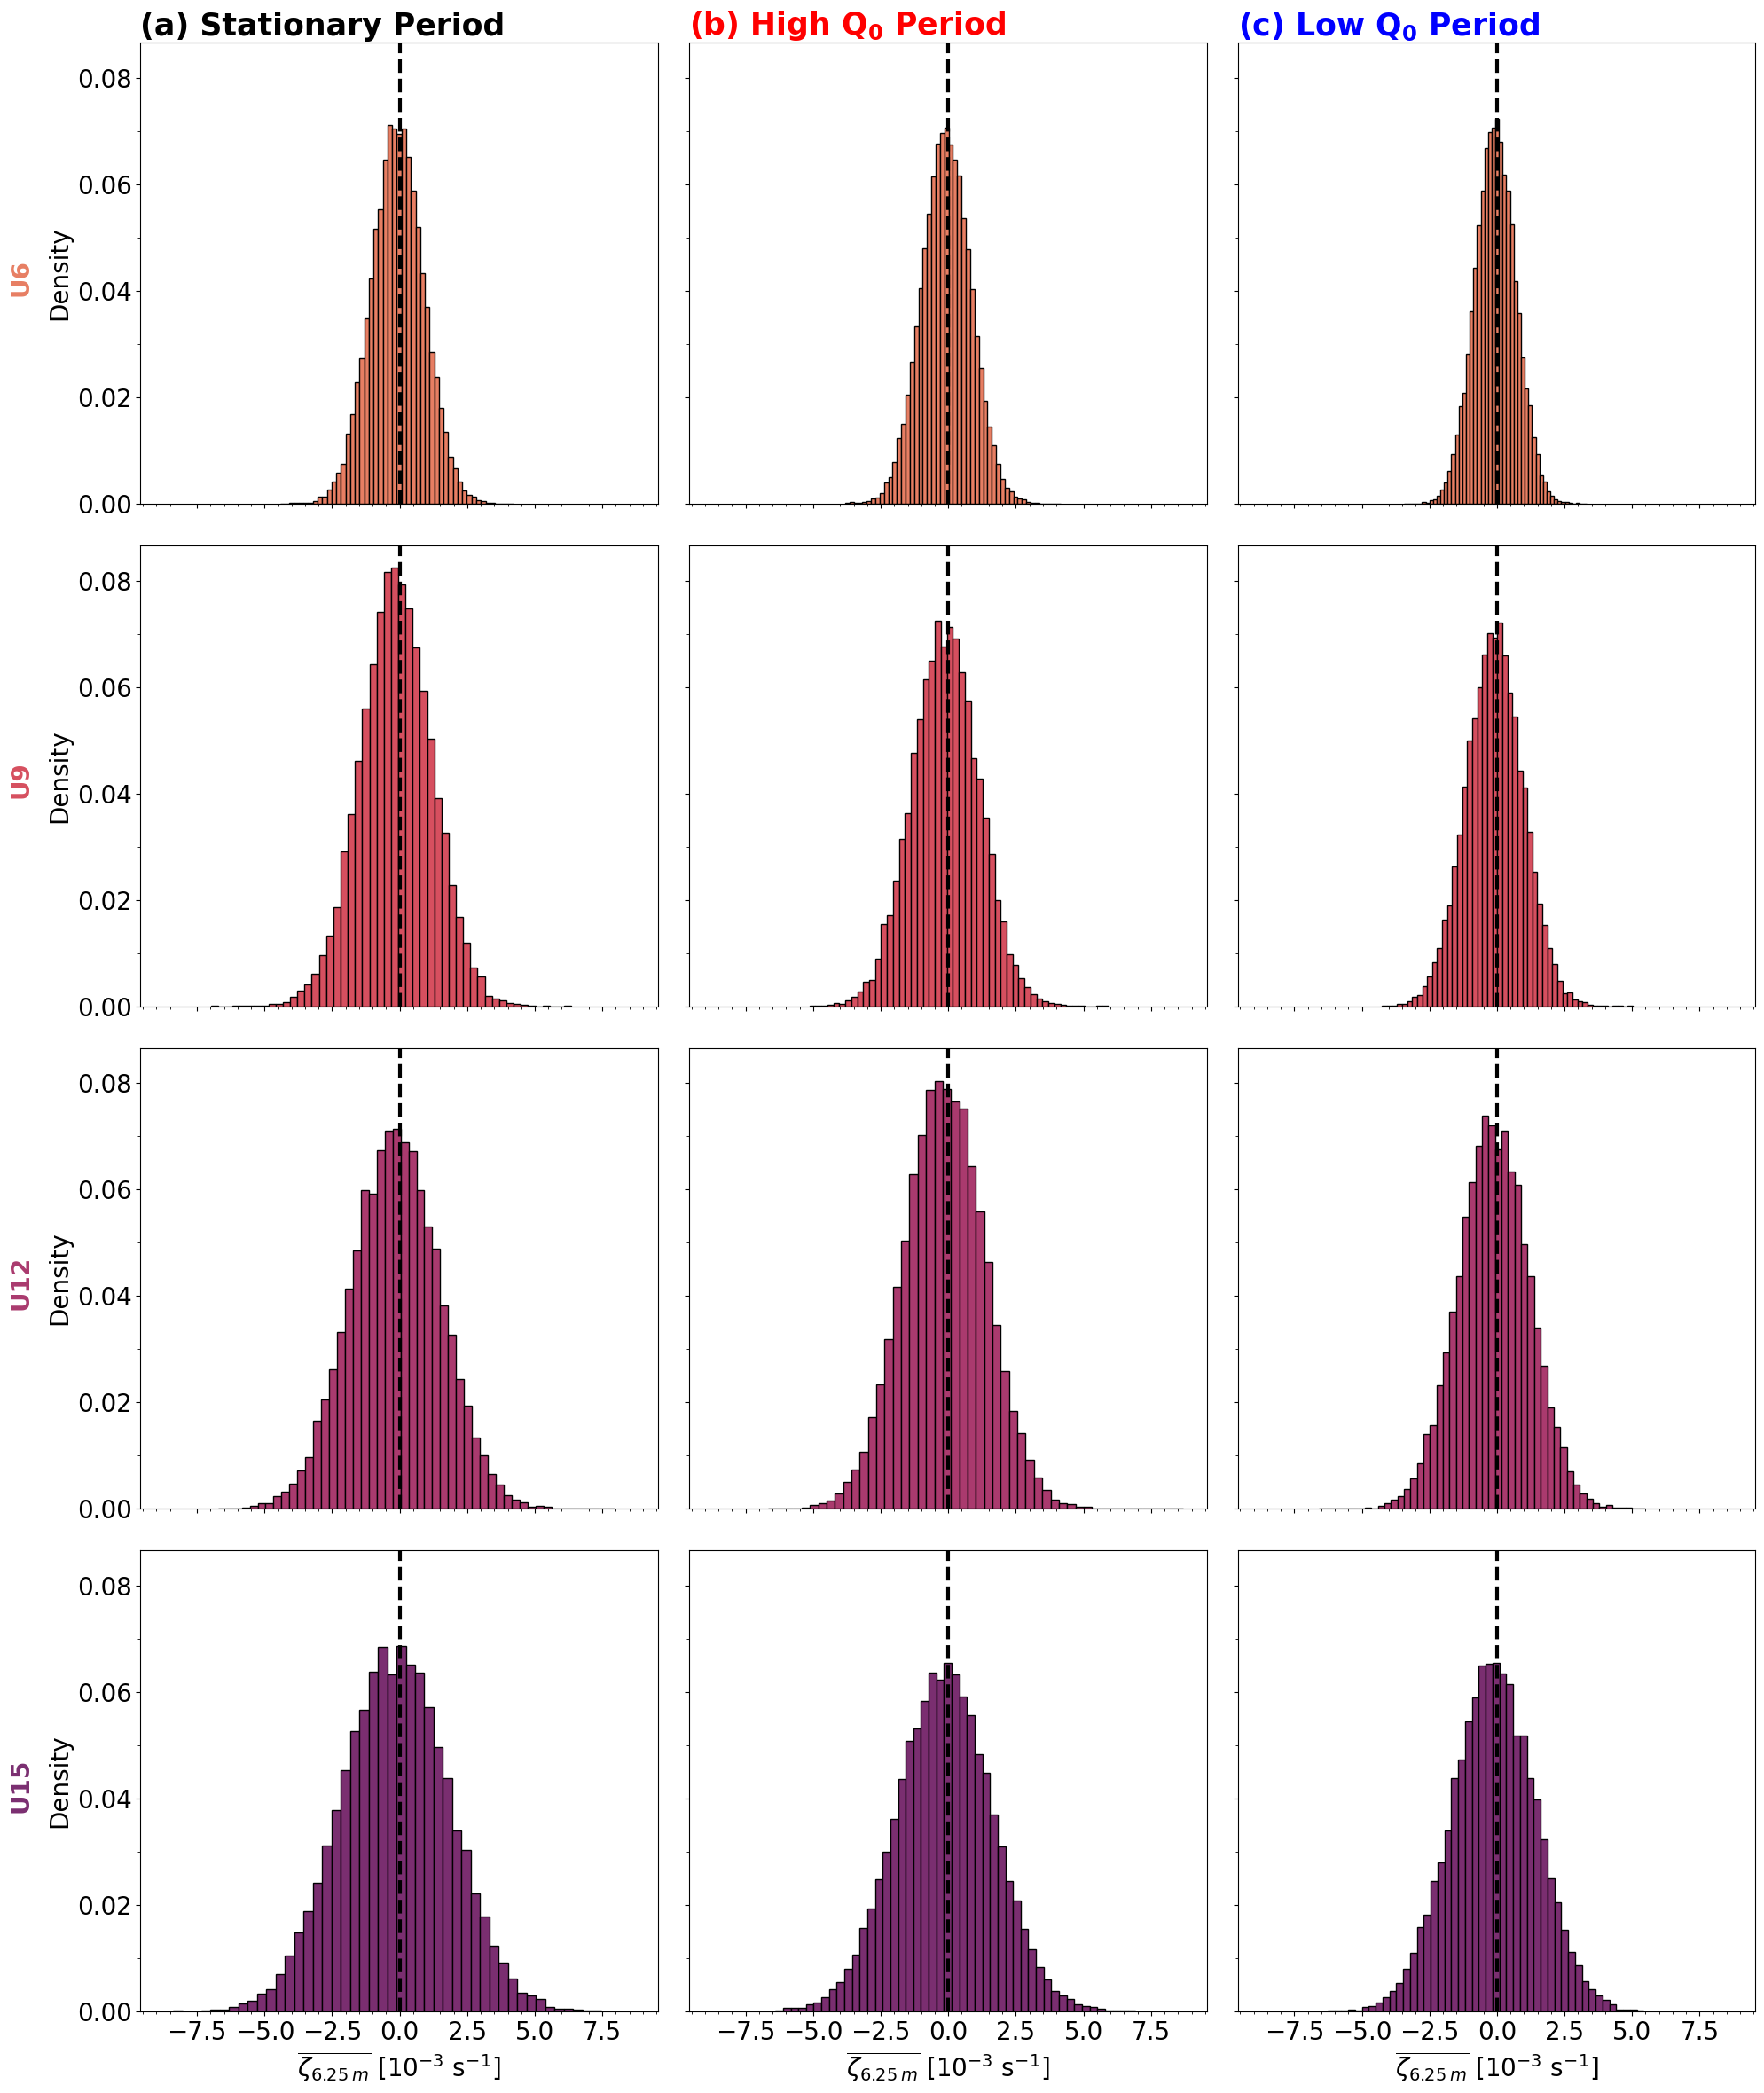

In [8]:
# Plot the PDF
fig, ax = plt.subplots(figsize=(20,24), nrows=4, ncols=3, sharex=True, sharey=True)

for i in range(4):

    # stationary period
    ax[i,0].bar(bin_edges_stat[i,:-1] * 10 ** 3, prob_stat[i], width=bin_width_stat[i] * 10 ** 3, 
                edgecolor='black', color=ug_colors[i])
    ax[i,0].set_ylabel('Density')
    ax[i,0].axvline(x=0, zorder=2, c="black", lw=3, ls="--")

    # high q0 period
    ax[i,1].bar(bin_edges_highq0[i,:-1] * 10 ** 3, prob_highq0[i], width=bin_width_highq0[i] * 10 ** 3, 
                edgecolor='black', color=ug_colors[i])
    ax[i,1].axvline(x=0, zorder=2, c="black", lw=3, ls="--")

    # low q0 period
    ax[i,2].bar(bin_edges_lowq0[i,:-1] * 10 ** 3, prob_lowq0[i], width=bin_width_lowq0[i] * 10 ** 3, 
                edgecolor='black', color=ug_colors[i])
    ax[i,2].axvline(x=0, zorder=2, c="black", lw=3, ls="--")

ax[0,0].set_title('(a) Stationary Period', fontsize=25, loc="left", c="black")
ax[0,1].set_title('(b) High $\\bf{Q_0}$ Period', fontsize=25, loc="left", c="red")
ax[0,2].set_title('(c) Low $\\bf{Q_0}$ Period', fontsize=25, loc="left", c="blue")

ax[3,0].set_xlabel("$\overline{\zeta_{6.25 \\> m}}$ [10$^{-3}$ s$^{-1}$]")
ax[3,1].set_xlabel("$\overline{\zeta_{6.25 \\> m}}$ [10$^{-3}$ s$^{-1}$]")
ax[3,2].set_xlabel("$\overline{\zeta_{6.25 \\> m}}$ [10$^{-3}$ s$^{-1}$]")

ax[0,0].xaxis.set_major_locator(MultipleLocator(2.5))
ax[0,0].xaxis.set_minor_locator(MultipleLocator(0.5))
ax[0,0].yaxis.set_major_locator(MultipleLocator(0.02))
ax[0,0].yaxis.set_minor_locator(MultipleLocator(0.01))

case = ["6", "9", "12", "15"]
for i, iax in enumerate(ax[:,0]):
    iax.text(-14, 0.0425, f"U{case[i]}", 
            rotation=90, fontsize=20, va="center", ha="center", weight="bold", c=ug_colors[i])

plt.tight_layout()

### Violin Plots

In [7]:
h_idx = 0

ug = [6, 9, 12, 15]
zeta = []
for i, (s, v) in enumerate(zip(s_all, vort_all)):
    for value in v.omega_z_abs_mean[:,h_idx].values:
        zeta.append((ug[i], value))
df_zeta = pd.DataFrame(zeta, columns=['ug', 'value'])

ug = [6, 9, 12, 15]
ls = []
for i, (s, v) in enumerate(zip(s_all, vort_ls_all)):
    ls_rat = v.ls_zeta3_rolls[:, h_idx].values# / v.ls_zeta3_normal[:,h_idx].values
    for value in ls_rat:
        ls.append((ug[i], value))
df_ls = pd.DataFrame(ls, columns=['ug', 'value'])
# Replace infinities with NaN
# df_ls.replace([float('inf'), float('-inf')], np.nan, inplace=True)
# # Drop rows with NaNs
# df_ls = df_ls.dropna()

Text(0.5, 1.0, 'Integral Length Scale of Surface $\\bf{\\zeta}$')

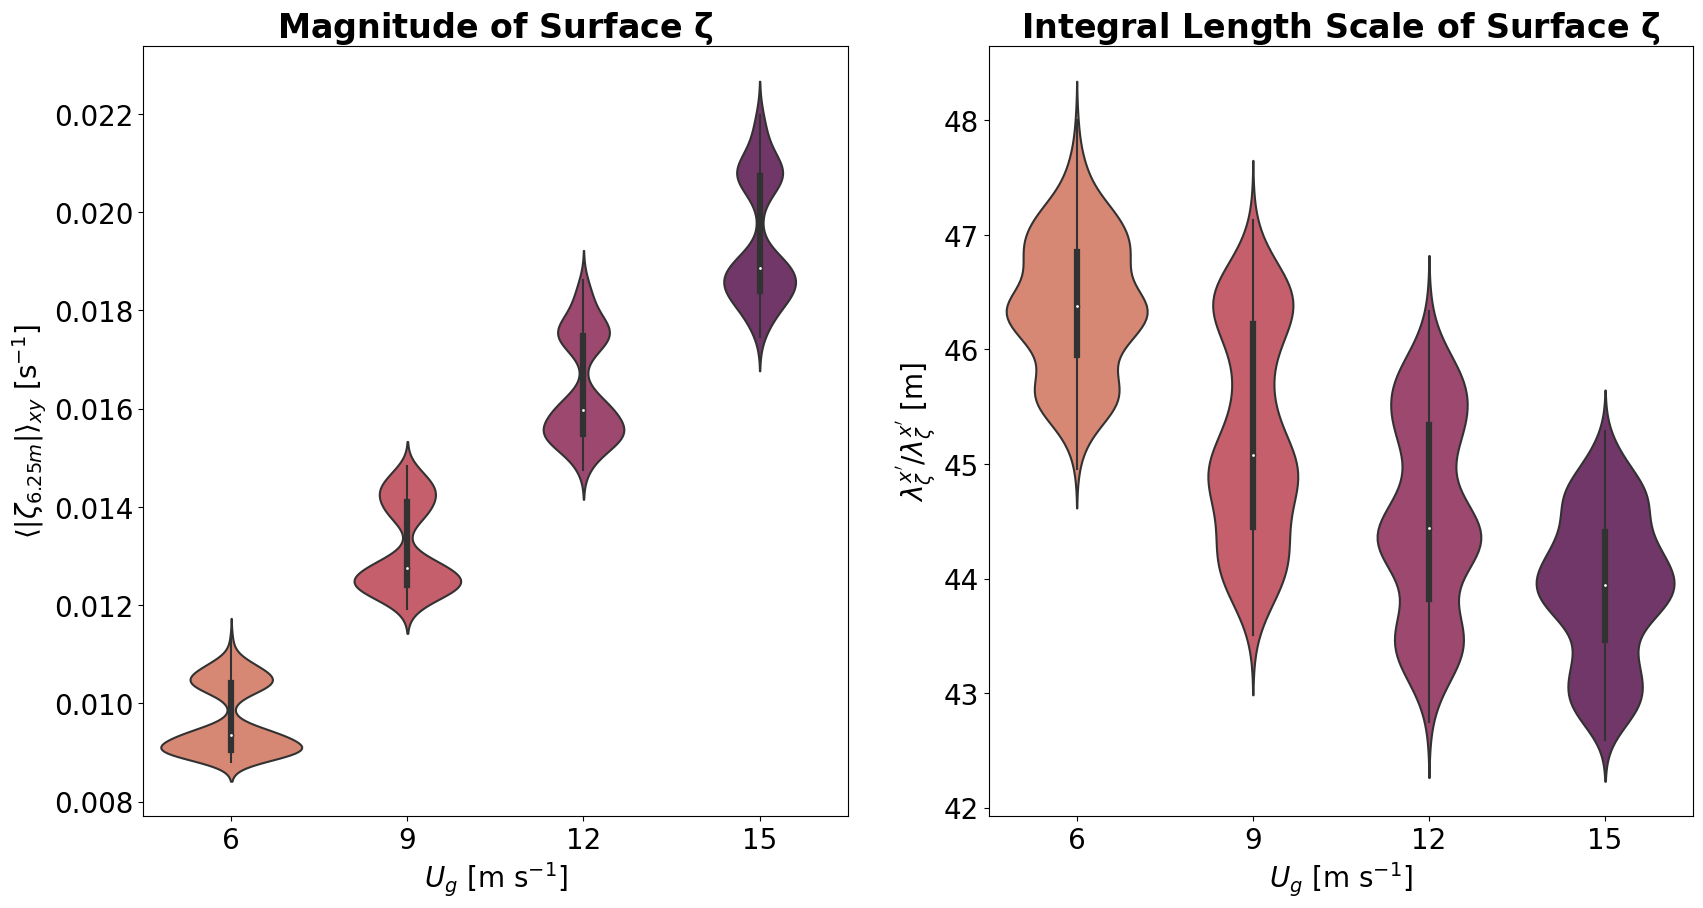

In [8]:
fig, ax = plt.subplots(figsize=(20,10), ncols=2)

sns.violinplot(x='ug', y='value', data=df_zeta, ax=ax[0], palette=ug_colors)
sns.violinplot(x='ug', y='value', data=df_ls.fillna(value=0), ax=ax[1], palette=ug_colors)

ax[0].set_xlabel("$U_g$ [m s$^{-1}$]")
ax[0].set_ylabel(f"$\\langle | \zeta_{{{s_all[0].z[h_idx].values} m}} | \\rangle_{{xy}}$ [s$^{{-1}}$]")
ax[0].set_title("Magnitude of Surface $\\bf{\zeta}$")
ax[1].set_xlabel("$U_g$ [m s$^{-1}$]")
ax[1].set_ylabel("$\lambda_{\zeta}^{x'} / \lambda_{\zeta}^{x'}$ [m]")
ax[1].set_title("Integral Length Scale of Surface $\\bf{\zeta}$")

In [9]:
h_idx = 0

ug = [6, 9, 12, 15]
zeta = []
for i, (s, v) in enumerate(zip(s_all, vort_all)):
    for value in v.omega_z_abs_mean[:,h_idx].values:
        zeta.append((ug[i], value))
df_zeta = pd.DataFrame(zeta, columns=['ug', 'value'])

ug = [6, 9, 12, 15]
rf = []
for i, (s, r) in enumerate(zip(s_all, roll_all)):
    # roll = r.rolling(time=24).mean().values
    roll = r.values
    for value in roll:
        rf.append((ug[i], value))
df_roll = pd.DataFrame(rf, columns=['ug', 'value'])
# Replace infinities with NaN
# df_ls.replace([float('inf'), float('-inf')], np.nan, inplace=True)
# # Drop rows with NaNs
# df_ls = df_ls.dropna()

Saved to: /home/rfrost/vorticity_figures/violin_mag_roll.pdf


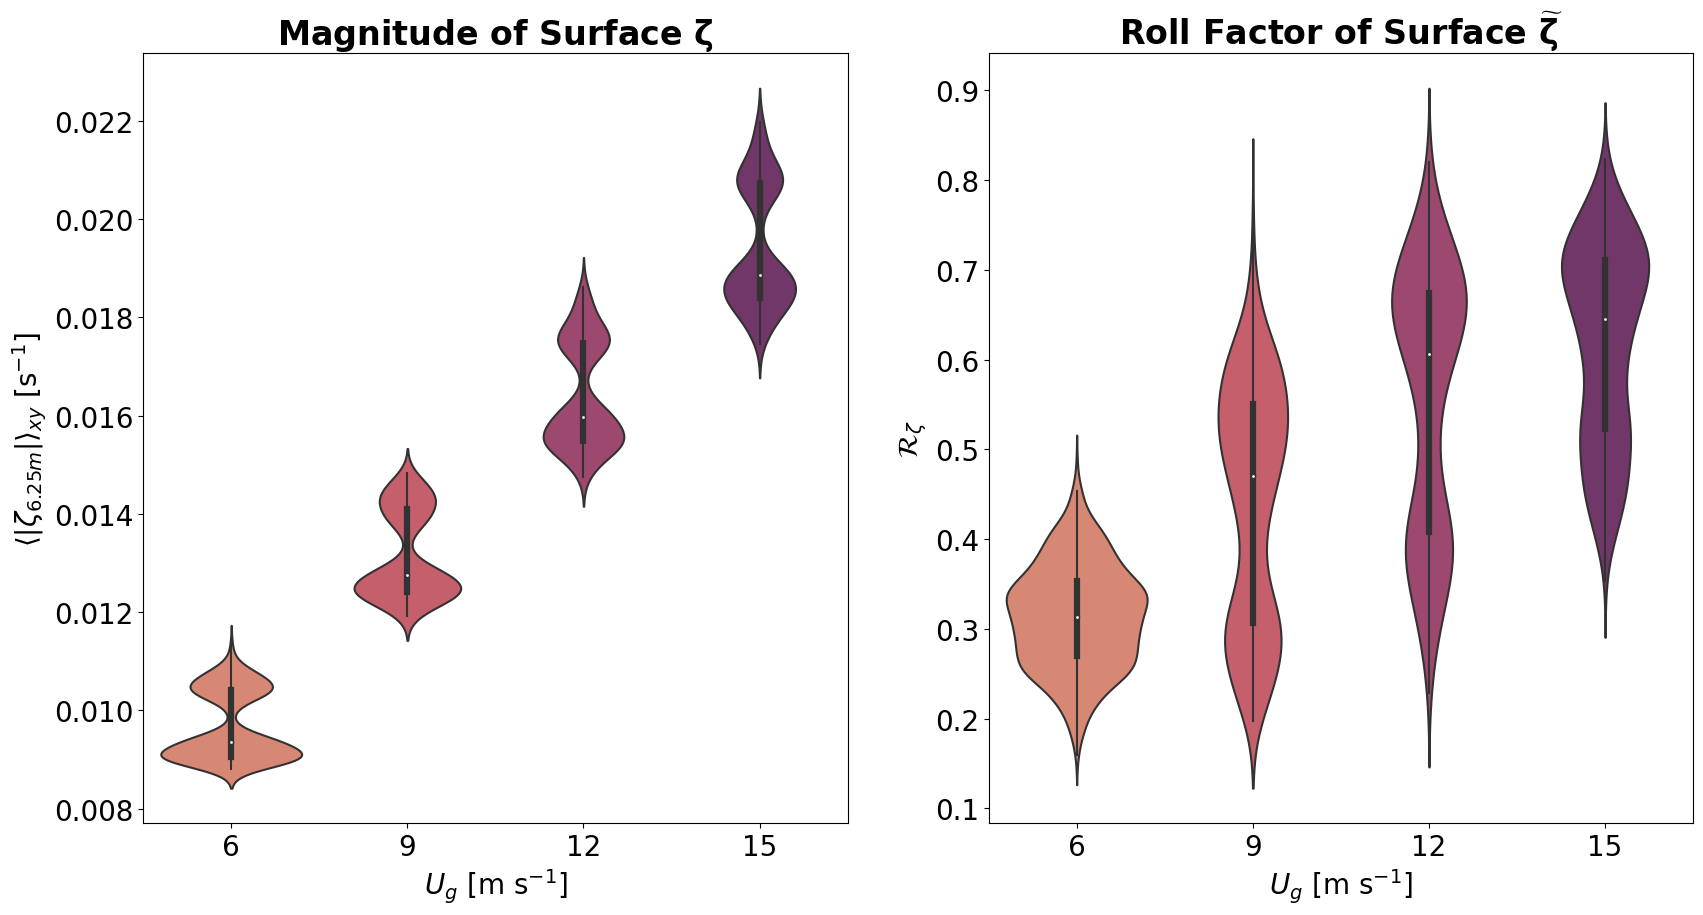

In [10]:
fig, ax = plt.subplots(figsize=(20,10), ncols=2)

sns.violinplot(x='ug', y='value', data=df_zeta, ax=ax[0], palette=ug_colors)
sns.violinplot(x='ug', y='value', data=df_roll, ax=ax[1], palette=ug_colors)

ax[0].set_xlabel("$U_g$ [m s$^{-1}$]")
ax[0].set_ylabel(f"$\\langle | \zeta_{{{s_all[0].z[h_idx].values} m}} | \\rangle_{{xy}}$ [s$^{{-1}}$]")
ax[0].set_title("Magnitude of Surface $\\bf{\zeta}$")
ax[1].set_xlabel("$U_g$ [m s$^{-1}$]")
ax[1].set_ylabel("$\mathcal{R}_{\zeta}$")
ax[1].set_title("Roll Factor of Surface $\\bf{\widetilde{\zeta}}$")

dout = f"{figdir}violin_mag_roll.pdf"
plt.savefig(dout, dpi=150, bbox_inches='tight', format='pdf')
print(f"Saved to: {dout}")

Text(0.5, 1.0, 'Roll Factor of Surface $\\bf{\\widetilde{\\zeta}}$')

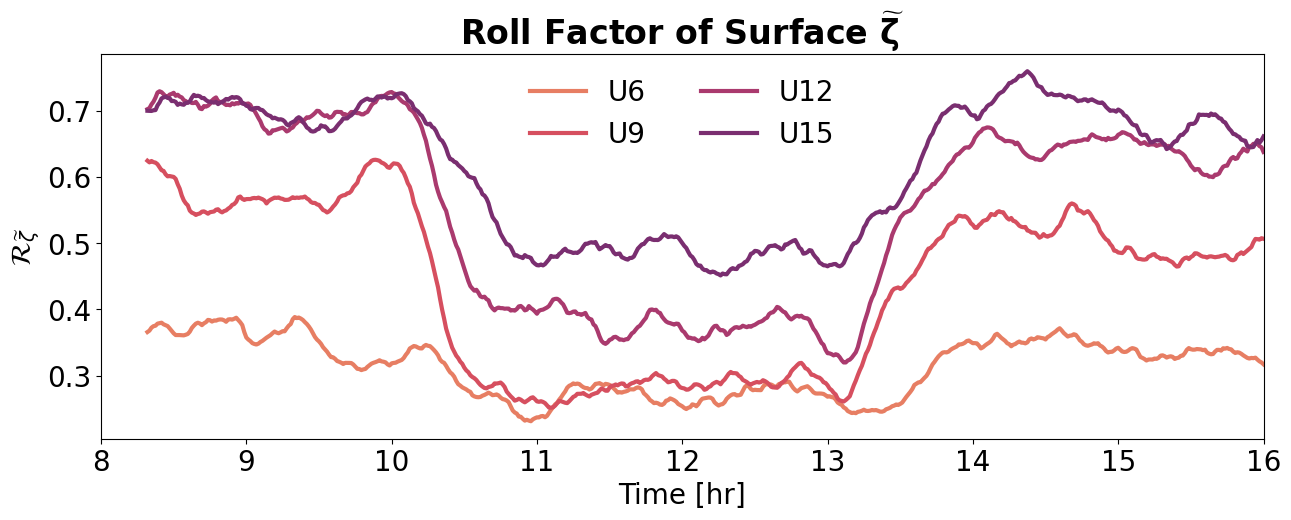

In [17]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1)

cases = ["U6", "U9", "U12", "U15"]

for i, r in enumerate(roll_all):
    time = r.time
    roll = r.rolling(time=24).mean()
    ax.plot(time, roll, c=ug_colors[i], label=cases[i], lw=3)

ax.legend(frameon=False, ncols=2)#, loc="upper left", fontsize=17)
ax.set_ylabel("$\mathcal{R}_{\widetilde{\zeta}}$")
ax.set_xlim(8,16)
ax.set_xlabel("Time [hr]")
ax.set_title("Roll Factor of Surface $\\bf{\widetilde{\zeta}}$")

# ax.axvline(x=10, c="red", lw=1.5, ls="--", zorder=0)
# ax.axvline(x=13, c="blue", lw=1.5, ls="--", zorder=0)
# ax.text(10.15, 42.75, f"$t_0$", ha="center", va="center", c="red", fontsize=20)
# ax.text(13.15, 42.75, f"$t_1$", ha="center", va="center", c="blue", fontsize=20)